In [2]:
import svm
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [4]:
num_samples=50
num_features=2
grid_size=100
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                    .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

In [5]:
print type(labels)
labels.shape

<class 'numpy.matrixlib.defmatrix.matrix'>


(50, 1)

In [6]:
labels = np.asarray(labels)
classes = np.unique(labels)

In [7]:
clf = svm.SVM(C = 0.1, kernel = 'linear')

In [8]:
clf.fit(samples, labels) 

[-1.  1.]
     pcost       dcost       gap    pres   dres
 0: -9.6711e+00 -9.1221e+00  2e+02  2e+01  5e-16
 1: -1.9451e+00 -8.6166e+00  1e+01  4e-01  8e-16
 2: -1.8331e+00 -3.1610e+00  1e+00  1e-16  4e-16
 3: -2.2169e+00 -2.4005e+00  2e-01  1e-16  4e-16
 4: -2.3068e+00 -2.3399e+00  3e-02  1e-16  4e-16
 5: -2.3251e+00 -2.3269e+00  2e-03  2e-16  4e-16
 6: -2.3261e+00 -2.3262e+00  4e-05  1e-16  4e-16
 7: -2.3262e+00 -2.3262e+00  4e-07  1e-16  4e-16
Optimal solution found.


<svm.SVM instance at 0x7fc2ecf6add0>

In [9]:
def plot(predictor, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
        
    
    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [10]:
predictor = clf

/home/asus/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


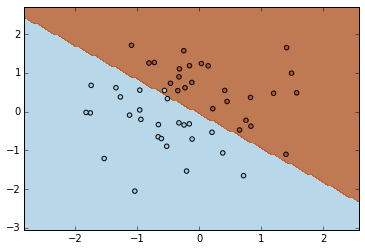

In [11]:
plot(predictor, samples, labels, grid_size)

In [12]:
import pandas as pd
path=""
X_train =pd.read_csv(path+"Xtr.csv", header=None)
Y =pd.read_csv(path+"Ytr.csv")
X_test =pd.read_csv(path+"Xte.csv", header=None)

y_train = Y["Prediction"].values
X_train = X_train.values
X_test = X_test.values

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf', degree = 3, n_components= 35, gamma= 0.01)

X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [13]:
def min_kernel(a, b):
    return np.sum(np.minimum(a,b))

In [14]:
from multiclasssvm import multiclass_svm
svm = multiclass_svm(kernel='rbf',C= 10.)

In [15]:
svm.fit(X_train_kpca,y_train)

[0 1 2 3 4 5 6 7 8 9]
[0 1]
     pcost       dcost       gap    pres   dres
 0:  4.1514e+03 -3.3504e+04  4e+04  6e-14  5e-14
 1:  5.6020e+02 -4.2956e+03  5e+03  1e-13  5e-14
 2: -3.0726e+02 -1.9818e+03  2e+03  2e-14  4e-14
 3: -4.9613e+02 -1.5693e+03  1e+03  4e-15  4e-14
 4: -6.0538e+02 -1.3419e+03  7e+02  7e-14  5e-14
 5: -6.7353e+02 -1.2115e+03  5e+02  3e-14  5e-14
 6: -7.3675e+02 -1.0924e+03  4e+02  7e-14  5e-14
 7: -7.7890e+02 -1.0148e+03  2e+02  1e-13  6e-14
 8: -8.0835e+02 -9.6547e+02  2e+02  3e-14  6e-14
 9: -8.2800e+02 -9.3117e+02  1e+02  6e-14  6e-14
10: -8.4303e+02 -9.0733e+02  6e+01  8e-14  6e-14
11: -8.5936e+02 -8.8120e+02  2e+01  8e-14  8e-14
12: -8.6474e+02 -8.7279e+02  8e+00  4e-14  8e-14
13: -8.6777e+02 -8.6944e+02  2e+00  7e-14  7e-14
14: -8.6842e+02 -8.6873e+02  3e-01  1e-13  8e-14
15: -8.6857e+02 -8.6857e+02  6e-03  1e-13  8e-14
16: -8.6857e+02 -8.6857e+02  6e-05  5e-14  8e-14
Optimal solution found.
[0 2]
     pcost       dcost       gap    pres   dres
 0:  1.1304e+

In [20]:
labels_predicted = svm.predict(X_train_kpca)

1
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
0
1
1
0
0
1
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
0
1
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
1
0
1
0
1
1
1
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
0
0
1
0
1
1


In [21]:
from sklearn.metrics import accuracy_score

print("SVM - Score on train_data : ", accuracy_score(y_train, labels_predicted))

('SVM - Score on train_data : ', 0.83320000000000005)


In [24]:
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf', gamma=0.01, C=10).fit(X_train_kpca,y_train)
labels_predicted = rbf_svc.predict(X_train_kpca)
print("SVM - Score on train_data : ", accuracy_score(y_train, labels_predicted))

('SVM - Score on train_data : ', 0.83819999999999995)
